<a href="https://colab.research.google.com/github/dnestorovic/FPL-Predictor/blob/main/Copy_of_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fantasy Premier League predictor

##**Dataset**
Because this project were developed in Google Colab, dataset must be loaded from git repository first.

In [2]:
!git clone https://github.com/dnestorovic/FPL-Predictor.git

Cloning into 'FPL-Predictor'...
remote: Enumerating objects: 9885, done.
remote: Counting objects: 100% (9885/9885), done.
remote: Compressing objects: 100% (7437/7437), done.
remote: Total 9885 (delta 1523), reused 9881 (delta 1522), pack-reused 0
Receiving objects: 100% (9885/9885), 20.85 MiB | 15.77 MiB/s, done.
Resolving deltas: 100% (1523/1523), done.


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

# **Dataset**

Loading dataset of merged gameweeks data

In [12]:
dataset = pd.read_csv('/content/FPL-Predictor/data/2020-21/gws/merged_gw.csv')

Some informations about dataset:

In [13]:
print('-------------------------------------------------COLUMNS-------------------------------------------------')
print(np.unique(dataset.columns), end="\n\n")
print('-------------------------------------------------DESCRIBE------------------------------------------------')
print(dataset.describe, end="\n\n")
print('--------------------------------------------------HEAD---------------------------------------------------')
print(dataset.head, end="\n\n")
print('--------------------------------------------------SIZE---------------------------------------------------')
print(dataset.shape)

-------------------------------------------------COLUMNS-------------------------------------------------
['GW' 'assists' 'bonus' 'bps' 'clean_sheets' 'creativity' 'element'
 'fixture' 'goals_conceded' 'goals_scored' 'ict_index' 'influence'
 'kickoff_time' 'minutes' 'name' 'opponent_team' 'own_goals'
 'penalties_missed' 'penalties_saved' 'position' 'red_cards' 'round'
 'saves' 'selected' 'team' 'team_a_score' 'team_h_score' 'threat'
 'total_points' 'transfers_balance' 'transfers_in' 'transfers_out' 'value'
 'was_home' 'xP' 'yellow_cards']

-------------------------------------------------DESCRIBE------------------------------------------------
<bound method NDFrame.describe of                        name position           team  ...  was_home  yellow_cards  GW
0            Aaron Connolly      FWD       Brighton  ...      True             0   1
1           Aaron Cresswell      DEF       West Ham  ...      True             0   1
2                Aaron Mooy      MID       Brighton  ...   

Dataset split by position. This section shows how position of a player affects on a:


*   Goals
*   Assists
*   Bonus points
*   Own goals
*   Average cost
*   Total points


In [22]:
goalkeepers = pd.DataFrame(dataset[dataset['position'] == 'GK'])
defenders = pd.DataFrame(dataset[dataset['position'] == 'DEF'])
midfielders = pd.DataFrame(dataset[dataset['position'] == 'MID'])
forwards = pd.DataFrame(dataset[dataset['position'] == 'FWD'])

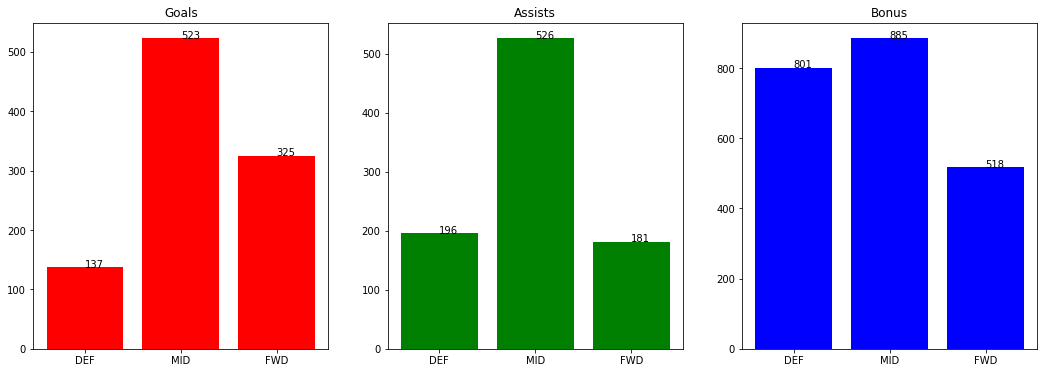

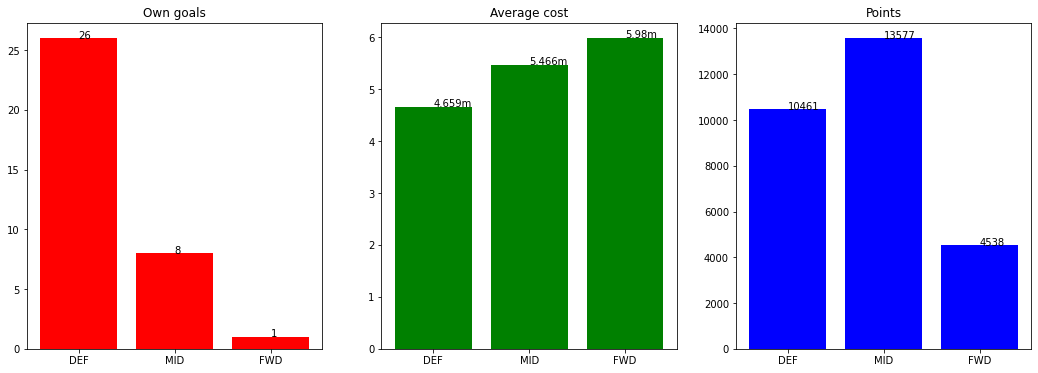

In [63]:
positions = ['DEF', 'MID', 'FWD']

goals = [defenders['goals_scored'].sum(), midfielders['goals_scored'].sum(), forwards['goals_scored'].sum()]
assists = [defenders['assists'].sum(), midfielders['assists'].sum(), forwards['assists'].sum()]
bonus = [defenders['bonus'].sum(), midfielders['bonus'].sum(), forwards['bonus'].sum()]

own_goals = [defenders['own_goals'].sum(), midfielders['own_goals'].sum(), forwards['own_goals'].sum()]
mean_value = [defenders['value'].mean()/10, midfielders['value'].mean()/10, forwards['value'].mean()/10]
points = [defenders['total_points'].sum(), midfielders['total_points'].sum(), forwards['total_points'].sum()]



plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.title('Goals')
plt.bar(positions, goals, color = 'r')
for i, v in enumerate(goals):
    plt.text(positions[i], v + 0.01, str(v))


plt.subplot(1, 3, 2)
plt.title('Assists')
plt.bar(positions, assists,  color = 'g')
for i, v in enumerate(assists):
    plt.text(positions[i], v + 0.01, str(v))


plt.subplot(1, 3, 3)
plt.title('Bonus')
plt.bar(positions, bonus,  color = 'b')
for i, v in enumerate(bonus):
    plt.text(positions[i], v + 0.01, str(v))

plt.show


plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.title('Own goals')
plt.bar(positions, own_goals,  color = 'r')
for i, v in enumerate(own_goals):
    plt.text(positions[i], v + 0.01, str(v))

plt.subplot(1, 3, 2)
plt.title('Average cost')
plt.bar(positions, mean_value,  color = 'g')
for i, v in enumerate(mean_value):
    plt.text(positions[i], v + 0.01, str(round(v, 3))+'m')


plt.subplot(1, 3, 3)
plt.title('Points')
plt.bar(positions, points,  color = 'b')
for i, v in enumerate(points):
    plt.text(positions[i], v + 0.01, str(v))


plt.show()